In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
df = pd.read_csv('alturas-pesos-1-train.csv')

In [3]:
from collections import Counter
tuplas = []
for line in df[['Peso', 'Altura']].values:
    tuplas.append(tuple(line))
frecuencia_conjunta = dict(Counter(tuplas))
conjunta_prob = {al:c/len(df) for al, c in frecuencia_conjunta.items()}

In [4]:
from helper import plot_joint_3d
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frecuencia_conjunta, bins_width = 4, az=50, el=-5, ax=ax)

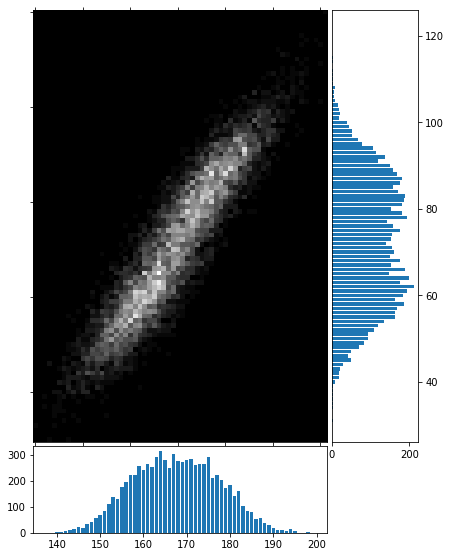

In [5]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frecuencia_conjunta)

# Armamos Conjunta Condicional por genero

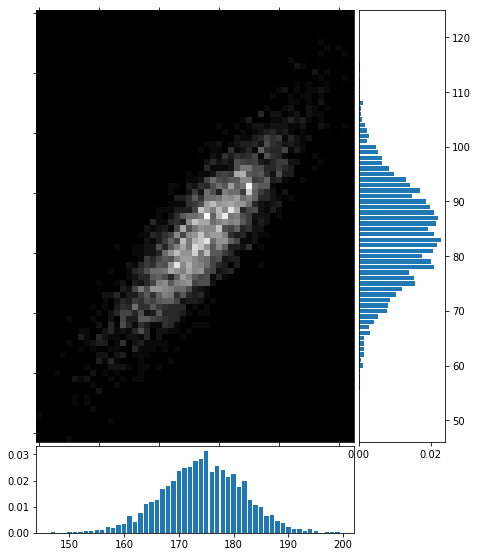

In [6]:
tuplas = []
for line in df[df['Genero']=='Hombre'][['Peso', 'Altura']].values:
    tuplas.append(tuple(line))
frecuencia_conjunta_hombre = dict(Counter(tuplas))
conjunta_prob_H = {al:c/len(df) for al, c in frecuencia_conjunta_hombre.items()}
conjunta_np, p_min, a_min = plot_joint_hists_dicts(conjunta_prob_H)

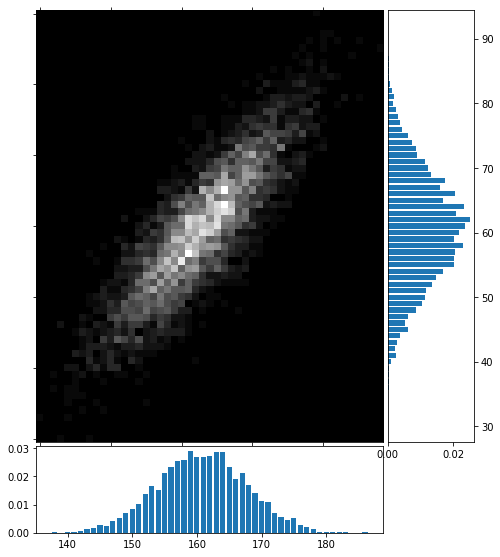

In [7]:
tuplas = []
for line in df[df['Genero']=='Mujer'][['Peso', 'Altura']].values:
    tuplas.append(tuple(line))
frecuencia_conjunta_mujer = dict(Counter(tuplas))
conjunta_prob_M = {al:c/len(df) for al, c in frecuencia_conjunta_mujer.items()}
_ = plot_joint_hists_dicts(conjunta_prob_M)

# Modelamos con Gaussiana bivariable

Con pandas

In [8]:
df[df['Genero']=='Hombre'][['Peso', 'Altura']].cov()

,Peso,Altura
Peso,80.787596,56.299412
Altura,56.299412,53.174570


In [9]:
df[df['Genero']=='Mujer'][['Peso', 'Altura']].cov()

,Peso,Altura
Peso,75.271662,50.747354
Altura,50.747354,47.723564


In [10]:
import numpy as np

Que tenemos que calcular?

In [11]:
pesos_alturas_H = df[df['Genero']=='Hombre'][['Peso', 'Altura']].values
pesos_alturas_M = df[df['Genero']=='Mujer'][['Peso', 'Altura']].values

In [12]:
mean_vector_H = pesos_alturas_H.mean(axis=0)
mean_vector_M = pesos_alturas_M.mean(axis=0)
print(mean_vector_H, mean_vector_M)

var_vector_H = pesos_alturas_H.var(axis=0)
var_vector_M = pesos_alturas_M.var(axis=0)
print(var_vector_H, var_vector_M)

[ 83.95577211 174.4177911 ] [ 60.63481741 160.80765383]
[80.76740921 53.16128268] [75.25283477 47.71162726]


In [13]:
cov_mat_H = np.cov(pesos_alturas_H.T)
cov_mat_M = np.cov(pesos_alturas_M.T)
print(cov_mat_H)
print(cov_mat_M)

[[80.78759602 56.2994124 ]
 [56.2994124  53.17456968]]
[[75.2716621  50.74735416]
 [50.74735416 47.72356412]]


In [14]:
from helper import plot_mv_gaussian

In [15]:
%matplotlib widget

In [16]:
plot_mv_gaussian(mean_vector_H, cov_mat_H, N=50)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
plot_mv_gaussian(mean_vector_M, cov_mat_M)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Como modelo generador de pesos y alturas gaussianas

In [55]:
N_gen = 20
print(np.random.multivariate_normal(mean_vector_M, cov_mat_M, N_gen).astype(int))

[[ 71 171]
 [ 51 153]
 [ 53 160]
 [ 57 164]
 [ 46 153]
 [ 60 158]
 [ 58 162]
 [ 67 168]
 [ 69 166]
 [ 61 162]
 [ 64 164]
 [ 53 155]
 [ 62 163]
 [ 74 166]
 [ 50 155]
 [ 58 163]
 [ 70 163]
 [ 55 159]
 [ 43 152]
 [ 59 156]]
